In [3]:
## Import Packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


## Extracting 'Features' and 'target'

In [6]:
features =df[['MSSubClass','LotArea','SalePrice', 'PoolArea', 'MSSubClass']]

### The features of only those columns are used which are providing rich information to get the target variable. Also, all the columns which have the same values for all rows are not included in feature set as they can't help to make predictions.

In [7]:
print(features.shape)

(1460, 5)


In [31]:
target= df['SalePrice']

In [32]:
print(target.shape)

(1460,)


## Splitting Dataset

In [33]:
features.dropna

<bound method DataFrame.dropna of       MSSubClass  LotArea  SalePrice  PoolArea  MSSubClass
0             60     8450     208500         0          60
1             20     9600     181500         0          20
2             60    11250     223500         0          60
3             70     9550     140000         0          70
4             60    14260     250000         0          60
...          ...      ...        ...       ...         ...
1455          60     7917     175000         0          60
1456          20    13175     210000         0          20
1457          70     9042     266500         0          70
1458          20     9717     142125         0          20
1459          20     9937     147500         0          20

[1460 rows x 5 columns]>

In [11]:
x_train, x_test, y_train, y_test =train_test_split(features,target,test_size=0.25,random_state=0)

## Applying Naiive Bayes Algorithm

In [12]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred  =  classifier.predict(x_test)
print(y_pred)

[201000 133000 110000 192000  88000  85000 283463 141000 755000 149000
 209500 137000 225000 123000 119000 145000 190000 124000 149500 155000
 165500 145000 110000 174000 185000 168000 177000  84500 320000 118500
 110000 213000 156000 250000 372402 175000 278000 113000 262500 325000
 244000 130000 165000 280000 402861 119000 125000 128000 172500  85000
 410000 156000 168000 100000 275000 123000 132000 240000 139000 115000
 137500 135000 134000 180500 193000 156932 132000 224900 139000 225000
 189000 118000  81000 392500 112000 248000 134900  79000 320000 158000
 140000 136500 107500 145000 200000 185000 105000 202500 186500 136500
 201000 190000 187500 200000 172500 157000 213500 185000 124500 163000
 260000 197900 120000 159500 106000 260000 143000 106500 179000 127000
  90000 118500 190000 120000 184000 155000 383970 133000 193000 270000
 141000 146000 128500 176000 214000 222000 410000 188000 200000 180000
 206000 194500 143000 184000 116000 213500 139400 179000 108000 176000
 15800

## Evaluating Performance 

In [13]:
cm = metrics.confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [14]:
print(ac)

0.5671232876712329


In [15]:
nb_score = classifier.score(x_test, y_test)
print(nb_score)

0.5671232876712329


In [16]:
m = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


## Plotting Confusion Matrix

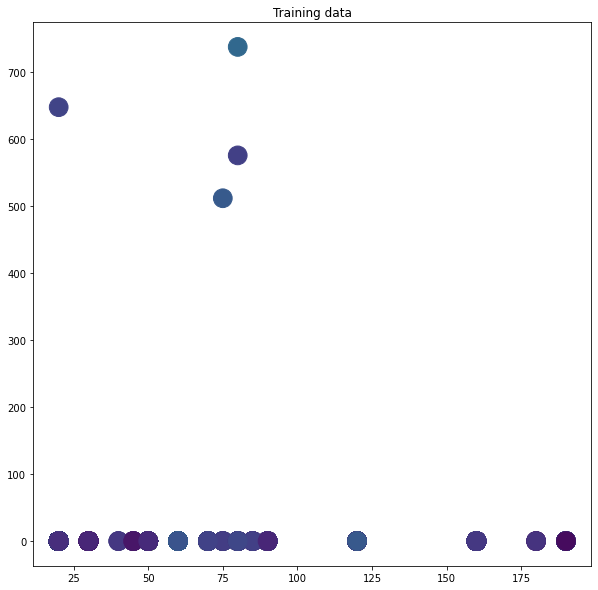

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x_train.iloc[:,0:1], x_train.iloc[:,3:4], c=y_train[:], s=350, cmap='viridis')
plt.title('Training data')
plt.show()

# Summary

### To prepare the dataset, I extract the features matrix and target array from the pandas DataFrame , Affter Splitting dataset, I applied Gaussian Naive Bayes Classifier to predict on a new data. After evaulating the performance to find the accuracy score which is approximately 0.5671. Plotting the Confusion Matrix in a Viridis Map, shows that the when data is abundant, other more complicated models tend to outperform Naive Bayes.